<a href="https://colab.research.google.com/github/linapaper/data_exercises_langPy/blob/main/Actividad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/ACTIVIDADES/heart_disease.csv'

Mounted at /content/drive


#Lectura y Exploración Visual

In [3]:
cardiovascular = pd.read_csv(ruta)
#Listar tabla de datos
cardiovascular.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [5]:
#Conocer el tamaño del conjunto de datos
cardiovascular.shape

(4238, 16)

In [6]:
#Conocer los tipos de datos presentes en el conjunto
cardiovascular.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [7]:
#filtrar por columnas específicas
cardiovascular[['age', 'currentSmoker']]

,age,currentSmoker
0,39,0
1,46,0
2,48,1
3,61,1
4,46,1
...,...,...
4233,50,1
4234,51,1
4235,48,1
4236,44,1


<Axes: xlabel='age', ylabel='count'>

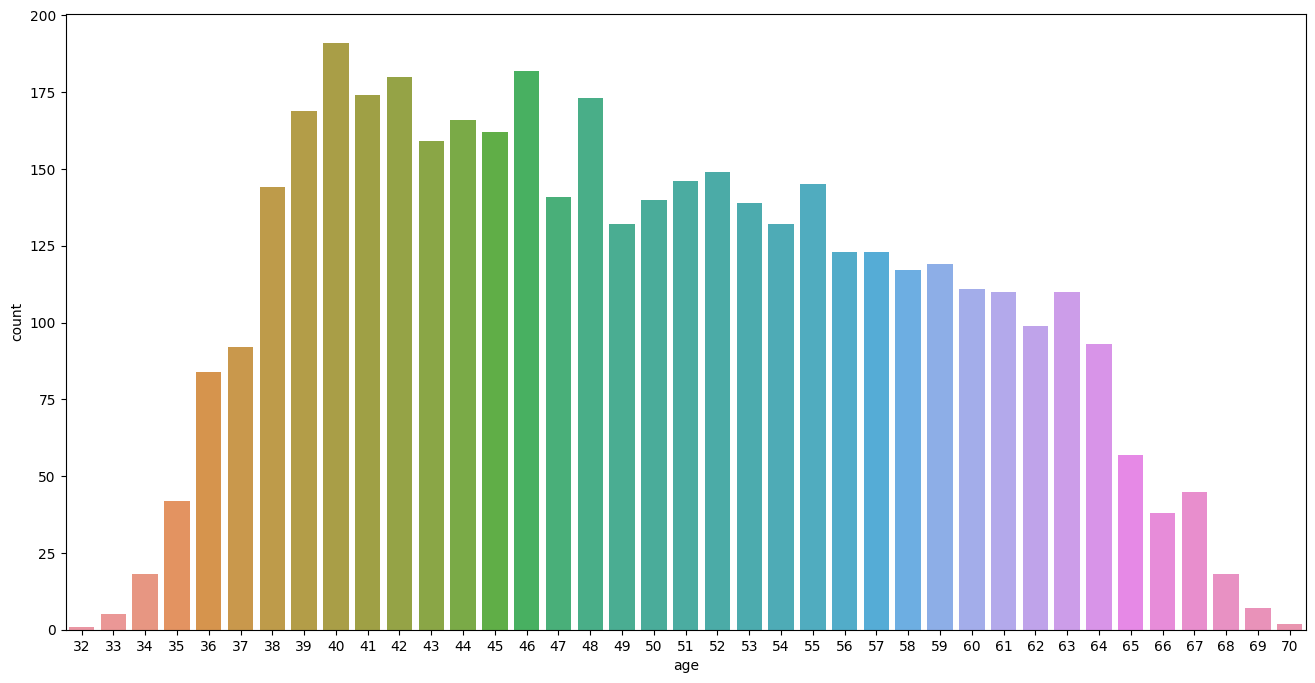

In [73]:
#distribucion de edades
edad = cardiovascular['age']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
fig.subplots_adjust(hspace=0.7)

sbn.countplot(x=edad, data=cardiovascular)

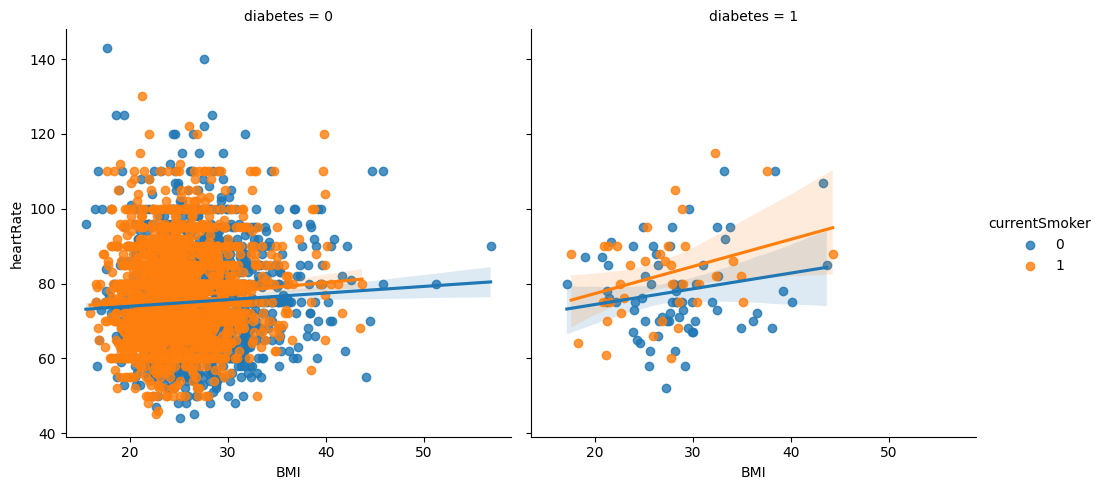

In [9]:
#Relacion entre variables
sbn.lmplot(data=cardiovascular, x="BMI", y="heartRate", col="diabetes", hue="currentSmoker")

#Normalizacion de Datos

In [10]:
#Identificacion de columnas con datos nulos
columns_with_nan = cardiovascular.columns[cardiovascular.isna().any()].tolist()
print(columns_with_nan)

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']


In [11]:
null_counts = cardiovascular.isnull().sum()
print(null_counts)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [12]:
# Para la columna education que se encuentra recategorizada
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
cardiovascular['education'] = imputer.fit_transform(cardiovascular[['education']])


In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
cardiovascular[['BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']] = imputer.fit_transform(cardiovascular[['BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']])
cardiovascular[['totChol', 'heartRate', 'glucose']] = np.round(cardiovascular[['totChol', 'heartRate', 'glucose']])

In [14]:
imputer = SimpleImputer(strategy='mean')

# Imputar la media en la columna "cigsPerDay" solo para las filas con "currentSmoker" igual a 1
imputed_values = imputer.fit_transform(cardiovascular.loc[cardiovascular['currentSmoker'] == 1, ['cigsPerDay']])
cardiovascular.loc[cardiovascular['currentSmoker'] == 1, 'cigsPerDay'] = np.round(imputed_values)

# Establecer en 0 los valores en "cigsPerDay" para las filas con "currentSmoker" igual a 0
cardiovascular.loc[cardiovascular['currentSmoker'] == 0, 'cigsPerDay'] = 0


In [15]:
null_counts = cardiovascular.isnull().sum()
print(null_counts)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [16]:
cardiovascular.sample(15)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3994,0,54,2.0,1,10.0,0.0,0,1,0,246.0,153.0,80.0,37.30,92.0,74.0,0
2076,1,64,2.0,0,0.0,0.0,0,0,0,287.0,121.0,70.0,23.64,68.0,75.0,0
845,0,46,2.0,0,0.0,0.0,0,0,0,304.0,131.5,78.5,21.02,68.0,112.0,0
3749,0,54,1.0,0,0.0,0.0,0,0,1,223.0,110.0,67.5,21.22,78.0,294.0,0
696,0,39,2.0,0,0.0,0.0,0,0,0,195.0,105.0,70.0,26.97,80.0,64.0,0
3436,1,52,1.0,0,0.0,0.0,0,0,0,285.0,135.0,86.0,27.78,88.0,93.0,0
3208,0,37,1.0,0,0.0,0.0,0,0,0,184.0,137.5,88.5,16.48,100.0,68.0,0
439,1,63,1.0,0,0.0,0.0,0,0,0,237.0,113.0,80.0,27.61,90.0,71.0,0
3544,1,57,1.0,0,0.0,0.0,0,0,0,242.0,130.0,74.0,28.90,60.0,53.0,0
3047,1,58,1.0,0,0.0,0.0,0,1,0,239.0,147.0,98.0,26.51,65.0,68.0,0


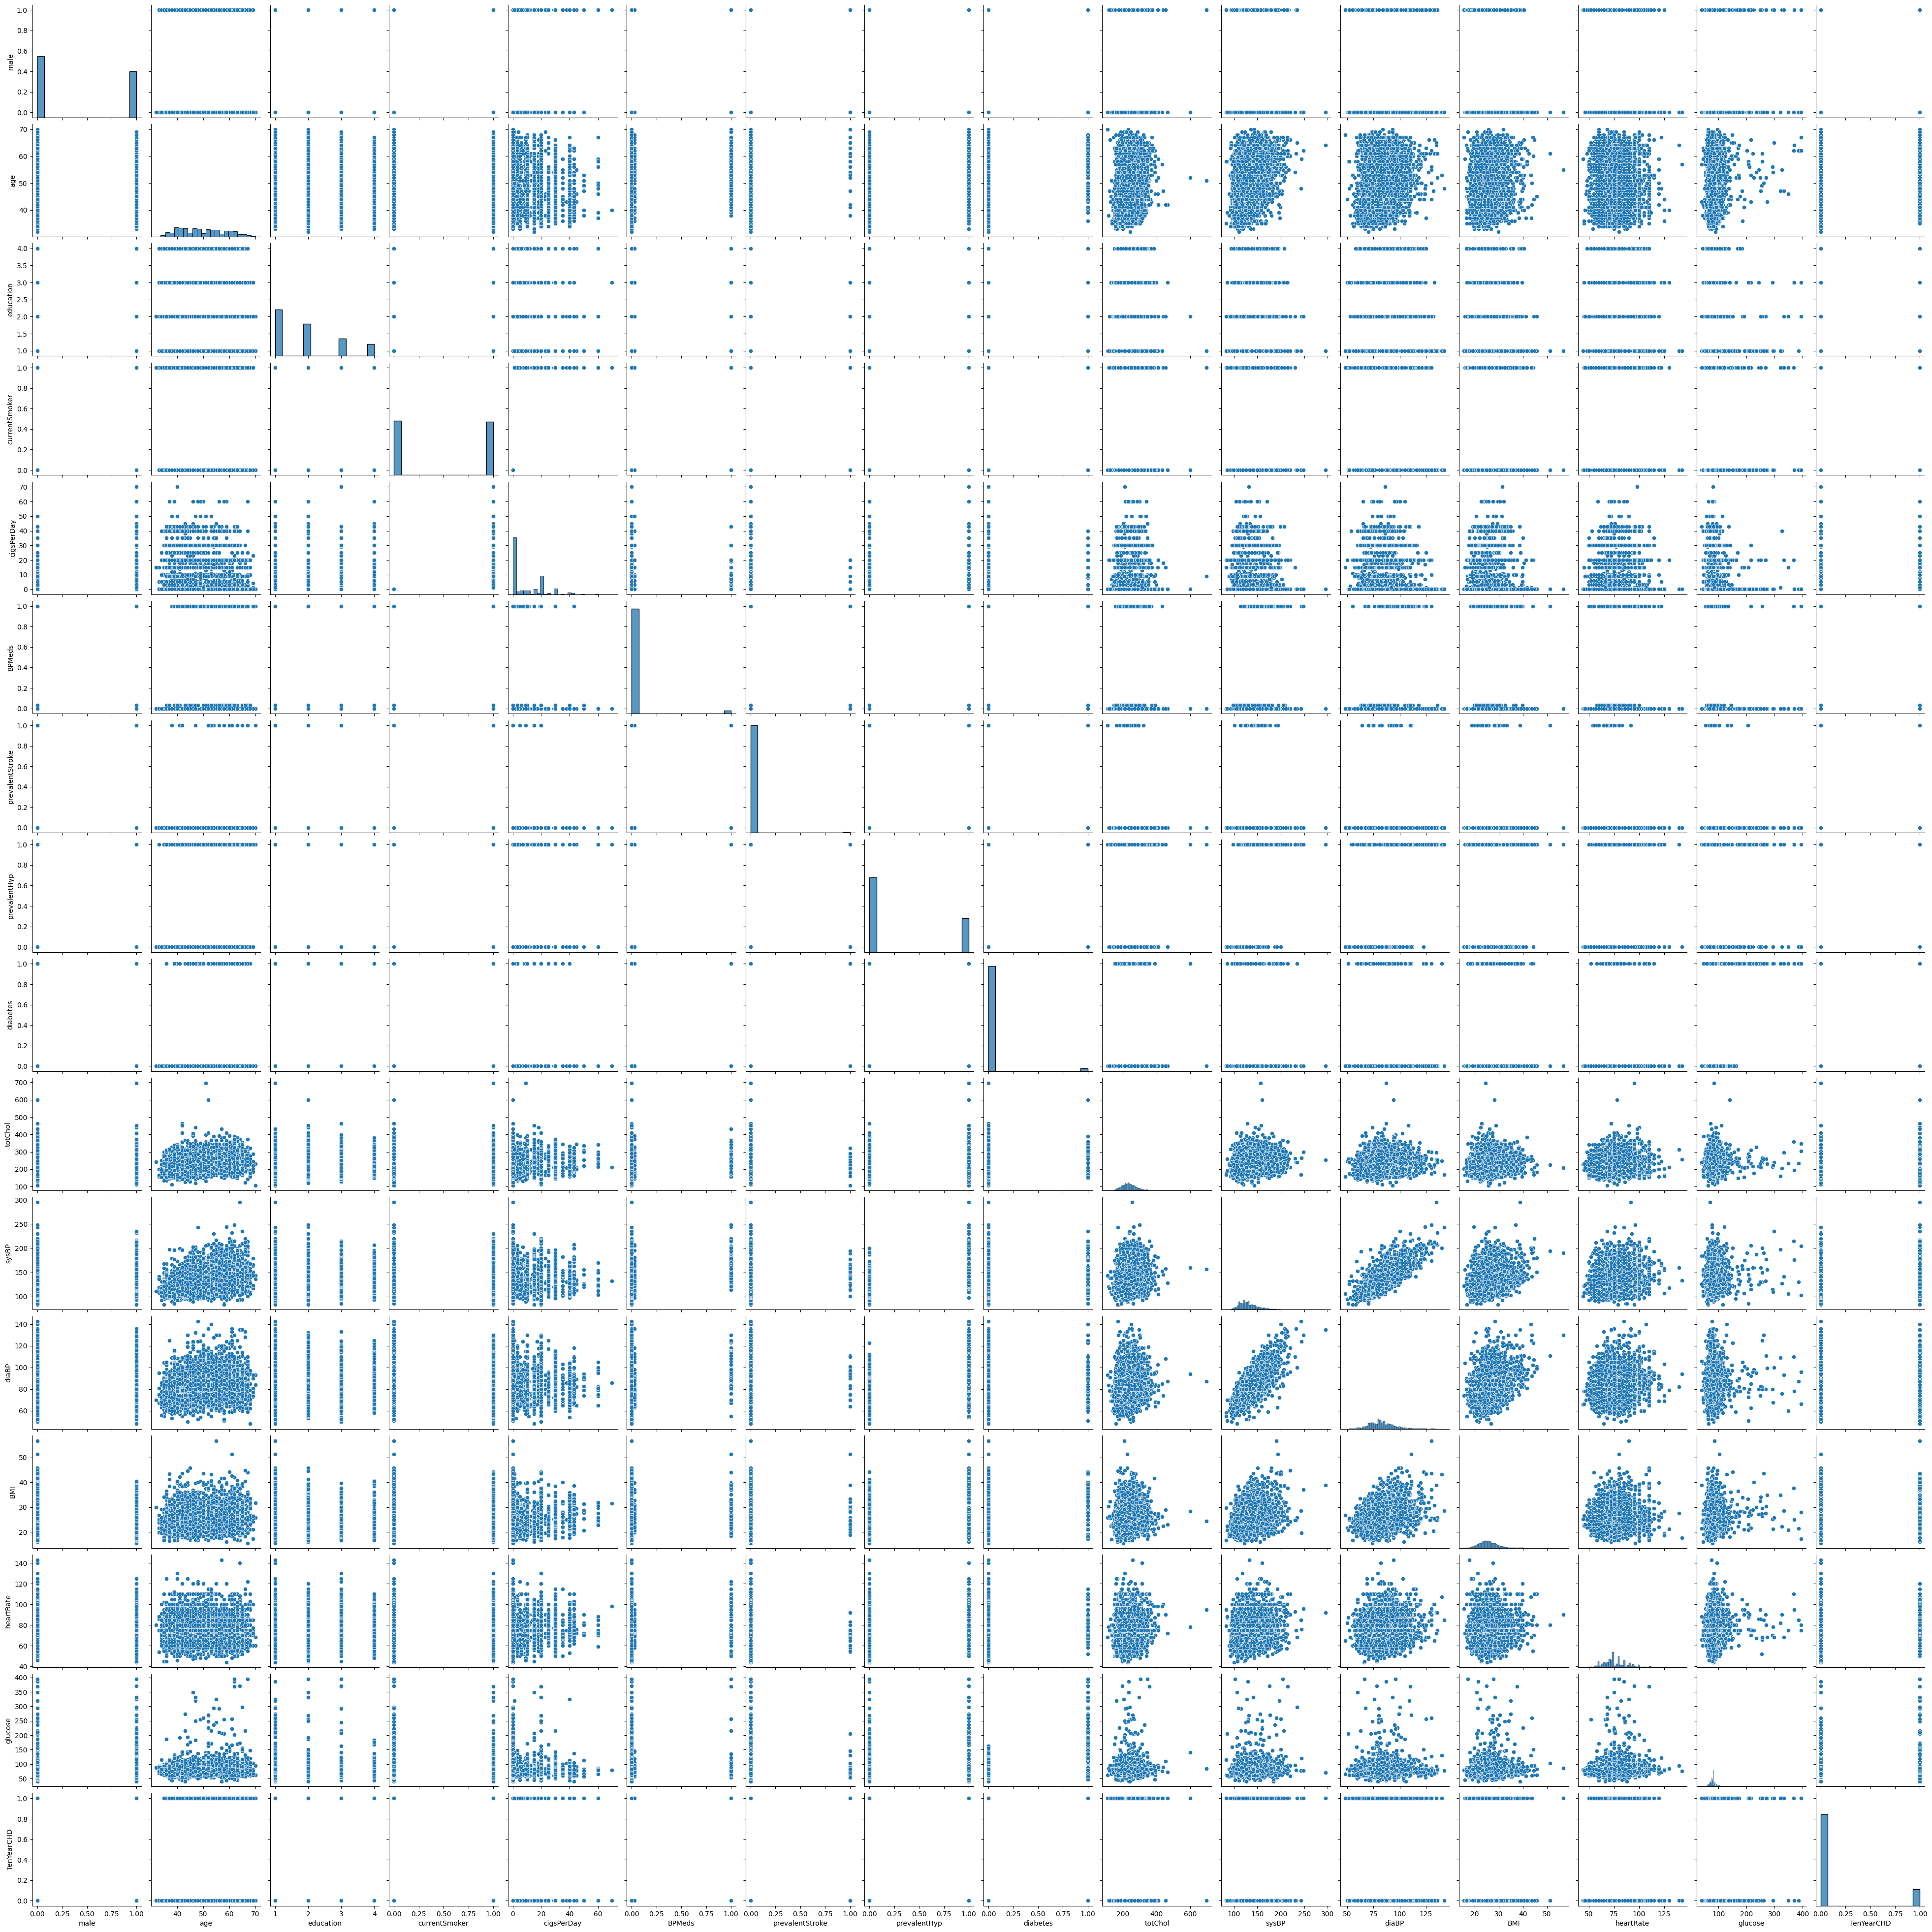

In [17]:
sbn.pairplot(cardiovascular)

#Selección de Características


In [18]:
cardiovascular.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.954696,0.494101,9.064653,0.02963,0.005899,0.310524,0.025720,236.724870,132.352407,82.893464,25.802008,75.878952,81.969797,0.151958
std,0.495022,8.572160,1.018510,0.500024,11.902367,0.16852,0.076587,0.462763,0.158316,44.326463,22.038097,11.910850,4.070953,12.025177,22.836605,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000



 Dataset escalado: 
           male       age  education  currentSmoker  cigsPerDay        BPMeds  \
0     1.153192 -1.234951   2.008372      -0.988271   -0.761674 -1.758438e-01   
1    -0.867158 -0.418257   0.044486      -0.988271   -0.761674 -1.758438e-01   
2     1.153192 -0.184916  -0.937456       1.011868    0.918862 -1.758438e-01   
3    -0.867158  1.331800   1.026429       1.011868    1.759131 -1.758438e-01   
4    -0.867158 -0.418257   1.026429       1.011868    1.170943 -1.758438e-01   
...        ...       ...        ...            ...         ...           ...   
4233  1.153192  0.048425  -0.937456       1.011868   -0.677647 -1.758438e-01   
4234  1.153192  0.165095   1.026429       1.011868    2.851479 -1.758438e-01   
4235 -0.867158 -0.184916   0.044486       1.011868    0.918862 -2.059023e-17   
4236 -0.867158 -0.651598  -0.937456       1.011868    0.498728 -1.758438e-01   
4237 -0.867158  0.281766   0.044486      -0.988271   -0.761674 -1.758438e-01   

      prevalentSt

<Axes: xlabel='totChol', ylabel='Count'>

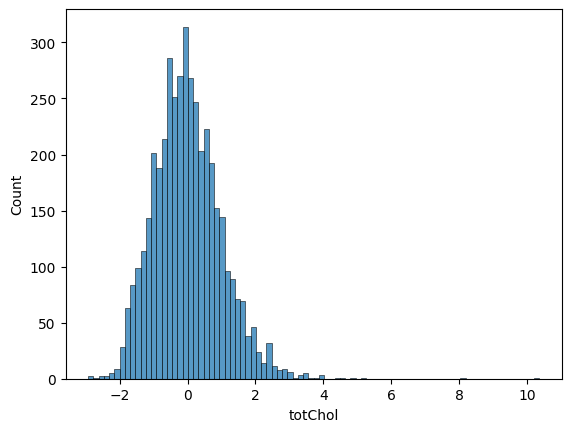

In [54]:
#Se realiza para la seleccion de caractersiticas la técnica estadística Análisis de la componente principal (PCA)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(cardiovascular)
df_s = pd.DataFrame(scaler.fit_transform(cardiovascular), columns=cardiovascular.columns)
print("\n Dataset escalado: \n", df_s)
sbn.histplot(df_s["totChol"])

Text(0, 0.5, 'Porcentaje de varianza explicado')

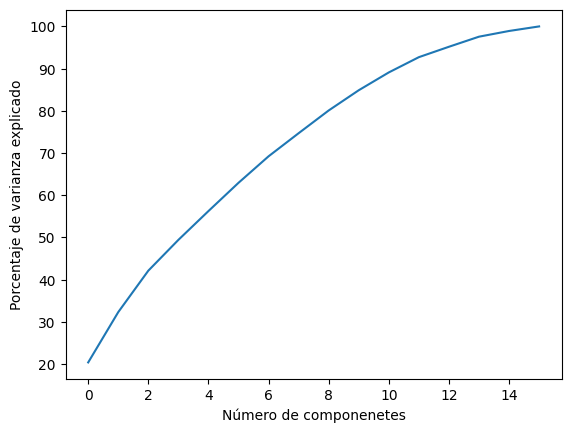

In [64]:
from sklearn.decomposition import PCA
# Los nombres de las características se identifican en las cabeceras de las columnas
features = df_s.columns
X = df_s[features]

# Analizamos el conjunto completo de variables
pca = PCA(n_components=len(features), random_state=2020)
pca.fit(X)
X_pca = pca.transform(X)
# Representamos en un gráfico el procentaje de varianza frente al número de componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Número de componenetes")
plt.ylabel("Porcentaje de varianza explicado")

In [65]:
# Vemos que con 10 de las variables podemos explicar el 85% de la variaza
comp_var = np.cumsum(pca.explained_variance_ratio_ * 100)[9]
print("Varianza 9 primeras componentes:", comp_var)

Varianza 9 primeras componentes: 84.88224300287001


In [67]:
pca_s = PCA(n_components=9, random_state=2020)
pca_s.fit(X_pca)
# Obtenemos el conjunto transformado que incorpora las variables más explicativas
X_pca_s = pca_s.transform(X_pca)
cols = ['PCA' + str(i) for i in range(9)]
df_pca = pd.DataFrame(X_pca_s, columns=cols)
print("Datos para las 10 componentes principales:\n", df_pca)

Datos para las 10 componentes principales:
           PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0    -1.885078 -1.011880  0.051113 -0.145883 -1.767670  0.783261 -0.926945   
1    -0.133933 -1.347216 -0.248565 -1.506137  0.146288 -0.272375  0.527787   
2    -1.034687  1.398063 -0.221291  0.433288  0.087338 -0.798044  0.591532   
3     1.843158  1.971555  0.335818  0.931384  0.551449  0.354505 -1.253932   
4    -0.875601  0.998011  0.015368 -1.466512  1.179425  0.532108 -0.766951   
...        ...       ...       ...       ...       ...       ...       ...   
4233  2.580215  1.451009 -0.228948  1.498261  0.760610 -0.885389 -0.771056   
4234 -2.117934  2.385432 -0.215840  0.800590 -0.023279  0.548499 -0.953739   
4235 -1.269701  0.650637  0.276891 -1.026234  1.301854  0.320237  0.181574   
4236 -1.189501  0.613800  0.014084 -1.254109  0.804622  0.206470  1.090435   
4237  0.054812 -1.539938  0.639762 -0.743376  0.901875  0.033704 -0.297893   

          PCA7     

#Grupos de Entrenamiento y Validacion

In [68]:
from sklearn.model_selection import train_test_split
# Las características que vamos a analizar son las seleccionados con PCA
pca_features = df_pca.columns
X = df_pca[pca_features]
y = df_s['totChol']

# Usamos la funcion propia de sklearn para dividir los datos para
# entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (2542, 9)
X_test: (1696, 9)
y_train: (2542,)
y_test: (1696,)


In [69]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
from sklearn import metrics
y_pred = lm.predict(X_test)

evar = metrics.explained_variance_score(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

print('- Varianza explicada: ', round(evar, 2))
print("- R2:", round(r2, 2))
print('- MAE: ', round(mae, 4))
print('- MSE: ', round(mse,4))
print('- RMSE: ', round(np.sqrt(mse), 4))

- Varianza explicada:  0.91
- R2: 0.91
- MAE:  0.2364
- MSE:  0.0881
- RMSE:  0.2969


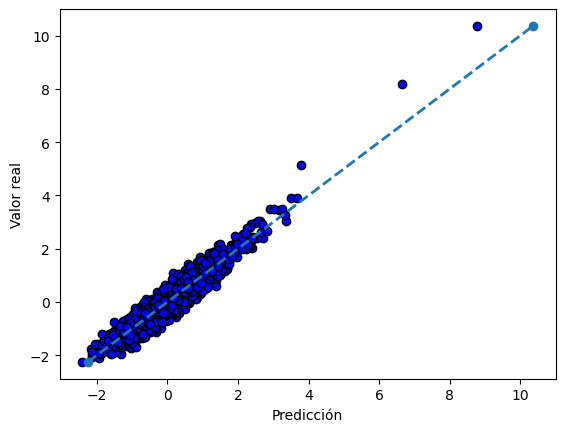

In [81]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, color='blue', edgecolors='black')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'o--', lw=2)
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor real')
plt.show()